In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

                            ('BROADCAST', 2054)  ('UNICAST', 2054)  \
2020-09-28 19:25:54.076143               0.0432             0.0181   

                            ('UNICAST', 34525)  ('BROADCAST', 34999)  \
2020-09-28 19:25:54.076143                0.01                0.4535   

                            ('BROADCAST', 2048)  ('UNICAST', 2048)  
2020-09-28 19:25:54.076143               0.6502             0.0021  


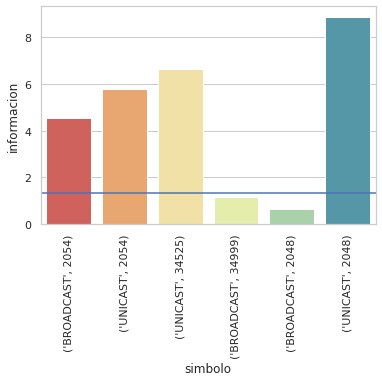

In [9]:
def porcentajeDeProtocolos(path, x_axis, y_axis):
    df = pd.read_csv(path)
    df.drop(index = [0, 1] , inplace=True)
    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_axis,y=y_axis, data=df, palette='Spectral')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
def InformacionPorSimbolo(path):
    df = pd.read_csv(path, index_col=0, header=0)
    
    df = df.tail(1).div(10000)   
    print(df)
    entropy = df
    entropy = np.sum(entropy*-1*np.log2(entropy), axis=1).iloc[-1]
    
    df = -1*np.log2(df)
    
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    df.columns = ['informacion', 'simbolo']
    sns.set(style="whitegrid")
    df = df.rename(columns={0: "informacion", "simbolos": "simbolo"})
    chart = sns.barplot(x="simbolo",y="informacion", data=df, palette='Spectral')
    chart.axhline(entropy)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
InformacionPorSimbolo('./statistics/capturas.csv')